In [2]:
%matplotlib notebook
import pandas as pd
import yfinance as yf
import mplfinance as mf
import numpy as np
import matplotlib.pyplot as plt

today = pd.Timestamp('today')
xle = yf.download( 'XLE',
                        start = '2020-01-01',
                        end = today,
                        progress = False)


In [ ]:
xle.describe()


In [ ]:
#Check if any data is missing
xle.isnull().any()


In [ ]:
mf.plot(xle, 
        type = 'candle',
        title = 'XLE 2021 walkthorugh',
        style =  'binance',
        ylabel = 'XLE Prices',
        volume = True,
        figratio=(12,8),
        show_nontrading = True,
        ylabel_lower='Volume of \n traded shares',
        mav = 10)

In [ ]:
print(xle)


# Calculate MACD

<IPython.core.display.Javascript object>


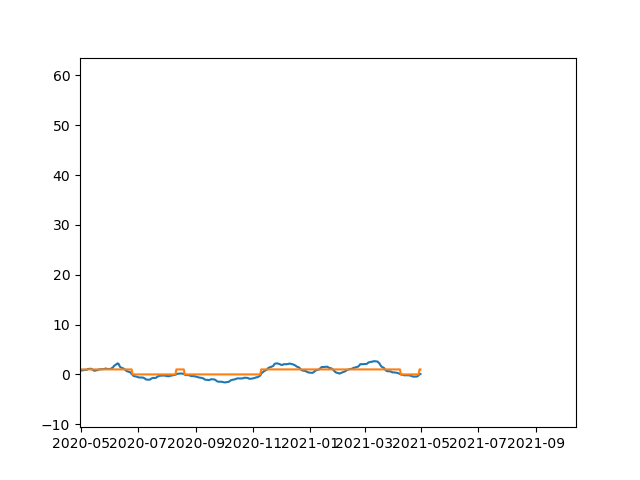

In [7]:
smoothing12 = 2/13
smoothing26 = 2/27
smoothing9 = 2/10

#input data (prices,vixc et), days=simple moving average windows
def sma(close_prices,days):
    ma = [0]*len(close_prices)
    for i in range(days,len(close_prices)):
        ma[i] = sum(close_prices[i-days:i])/days
    return ma

def ema(close_prices,sma,smoothing,days):
    emavg = [0]*len(close_prices)
    emavg[days] = sma[days]
    for i in range(days+1,len(close_prices)):
        emavg[i] = (close_prices[i]-emavg[i-1])*smoothing+emavg[i-1]
    return emavg
    
#input yfinance dataframe, returns dataframe with macd and macdindicator added
def macd(data):
    smoothing12 = 2/13
    smoothing26 = 2/27
    smoothing9 = 2/10
    sma12 = sma(data['Close'],12)
    sma26 = sma(data['Close'],26)

    ema12 = ema(data['Close'],sma12,smoothing12,12)
    ema26 = ema(data['Close'],sma26,smoothing26,26)
    macd = np.subtract(ema12,ema26)
    data['macd'] = macd
    data['macd_indicator'] = np.where(macd>0,1,0)
    return data
    
    
    
macd(xle)
plt.close()
plt.plot(xle['macd'])
plt.plot(xle['macd_indicator'])
plt.show()

In [ ]:
sma12 = sma(xle['close'],12)
sma26 = sma(xle['close'],26)


ema12 = ema(xle['close'],sma12,smoothing12,12)
ema26 = ema(xle['close'],sma26,smoothing26,26)

close = xle['close']
macd = np.subtract(ema12[26:len(ema12)],ema26[26:len(ema26)])

           
macdsma = sma(macd,9)

macdema = ema(macd,macdsma,smoothing9,9)
plt.plot(macdema)
plt.plot(macd)
plt.plot(np.subtract(macd,macdema))
plt.show()



In [ ]:
print(ema12[12])

In [ ]:
len(xle['close'])

In [ ]:
def derivative(data):
    dx = [0]*(len(data))
    for i in range(1,len(data)-1):
        dx[i] = data[i]-data[i-1]
    return dx



In [ ]:
macd_sig_ma = sma(derivative(macd_sig),3)

In [ ]:
plt.plot(macd_sig)
plt.plot(macd_sig_ma)
plt.show()

# Calculate RSI

In [16]:
def rsi(data,window_length):
    delta = data['Close'].diff()
    delta = delta[1:]
    
    # Make the positive gains (up) and negative gains (down) Series
    up, down = delta.copy(), delta.copy()
    up[up < 0] = 0
    down[down > 0] = 0
    
    
    # Calculate the EWMA
    roll_up1 = up.ewm(span=window_length).mean()
    roll_down1 = down.abs().ewm(span=window_length).mean()

    # Calculate the RSI based on EWMA
    RS1 = roll_up1 / roll_down1
    RSI1 = 100.0 - (100.0 / (1.0 + RS1))

    # Calculate the SMA
    roll_up2 = up.rolling(window_length).mean()
    roll_down2 = down.abs().rolling(window_length).mean()

    # Calculate the RSI based on SMA
    RS2 = roll_up2 / roll_down2
    RSI2 = 100.0 - (100.0 / (1.0 + RS2))
    
    data['RSI'] = RSI2
    data['RSI_indicator'] = np.where(data['RSI']>50,1,0)
    
    return data



In [17]:
RSI = rsi(xle,14)
RSI

,Open,High,Low,Close,Adj Close,Volume,macd,macd_indicator,RSI,RSI_indicator
Date,,,,,,,,,,
2020-01-02,60.439999,60.669998,60.230000,60.580002,56.201008,11944700,0.000000,0,NaN,0
2020-01-03,61.130001,61.310001,60.099998,60.400002,56.034016,29502900,0.000000,0,NaN,0
2020-01-06,60.610001,61.180000,60.400002,60.869999,56.470043,22458100,0.000000,0,NaN,0
2020-01-07,60.700001,60.770000,60.000000,60.709999,56.321609,11462500,0.000000,0,NaN,0
2020-01-08,60.650002,60.720001,59.630001,59.709999,55.393890,19021400,0.000000,0,NaN,0
...,...,...,...,...,...,...,...,...,...,...
2021-04-26,47.360001,48.220001,47.360001,47.860001,47.860001,17945900,-0.430051,0,41.907516,0
2021-04-27,48.040001,48.610001,47.820000,48.439999,48.439999,21134400,-0.365415,0,45.156863,0
2021-04-28,48.799999,50.299999,48.759998,50.110001,50.110001,32937000,-0.177391,0,59.569404,1


In [ ]:
plt.plot(RSI[26:len(ema26)])
plt.show()

In [ ]:
plt.plot(macd_sig)
plt.plot(macd_sig_ma)
plt.show()

# TTM Squeeze

https://github.com/hackingthemarkets/ttm-squeeze

In [22]:

import os, pandas
import plotly.graph_objects as go
symbol = 'XLE'
df = yf.download( 'XLE',
                        start = '2021-01-01',
                        end = today,
                        interval = '1h',
                        progress = False)
def in_squeeze(df):
    return np.where((df['lower_band'] > df['lower_keltner']) and (df['upper_band'] < df['upper_keltner']),1,0)
    
def ttm(df):
    df['20sma'] = df['Close'].rolling(window=20).mean()
    df['stddev'] = df['Close'].rolling(window=20).std()
    df['lower_band'] = df['20sma'] - (2 * df['stddev'])
    df['upper_band'] = df['20sma'] + (2 * df['stddev'])

    df['TR'] = abs(df['High'] - df['Low'])
    df['ATR'] = df['TR'].rolling(window=20).mean()

    df['lower_keltner'] = df['20sma'] - (df['ATR'] * 1.5)
    df['upper_keltner'] = df['20sma'] + (df['ATR'] * 1.5)

    df['squeeze_on'] = df.apply(in_squeeze, axis=1)
    return df
#if df.iloc[-3]['squeeze_on'] and not df.iloc[-1]['squeeze_on']:
#    print("{} is coming out the squeeze".format(symbol))

# save all dataframes to a dictionary
# we can chart individual names below by calling the chart() function
#dataframes[symbol] = df


def chart(df):
    candlestick = go.Candlestick(open=df['Open'], high=df['High'], low=df['Low'], close=df['Close'])
    upper_band = go.Scatter(y=df['upper_band'], name='Upper Bollinger Band', line={'color': 'red'})
    lower_band = go.Scatter(y=df['lower_band'], name='Lower Bollinger Band', line={'color': 'red'})

    upper_keltner = go.Scatter(y=df['upper_keltner'], name='Upper Keltner Channel', line={'color': 'blue'})
    lower_keltner = go.Scatter(y=df['lower_keltner'], name='Lower Keltner Channel', line={'color': 'blue'})

    fig = go.Figure(data=[candlestick, upper_band, lower_band, upper_keltner, lower_keltner])
    fig.layout.xaxis.type = 'category'
    fig.layout.xaxis.rangeslider.visible = False
    fig.show()



In [23]:
ttm(xle)

,Open,High,Low,Close,Adj Close,Volume,macd,macd_indicator,RSI,RSI_indicator,20sma,stddev,lower_band,upper_band,TR,ATR,lower_keltner,upper_keltner,squeeze_on
Date,,,,,,,,,,,,,,,,,,,
2020-01-02,60.439999,60.669998,60.230000,60.580002,56.201008,11944700,0.000000,0,NaN,0,NaN,NaN,NaN,NaN,0.439999,NaN,NaN,NaN,0
2020-01-03,61.130001,61.310001,60.099998,60.400002,56.034016,29502900,0.000000,0,NaN,0,NaN,NaN,NaN,NaN,1.210003,NaN,NaN,NaN,0
2020-01-06,60.610001,61.180000,60.400002,60.869999,56.470043,22458100,0.000000,0,NaN,0,NaN,NaN,NaN,NaN,0.779999,NaN,NaN,NaN,0
2020-01-07,60.700001,60.770000,60.000000,60.709999,56.321609,11462500,0.000000,0,NaN,0,NaN,NaN,NaN,NaN,0.770000,NaN,NaN,NaN,0
2020-01-08,60.650002,60.720001,59.630001,59.709999,55.393890,19021400,0.000000,0,NaN,0,NaN,NaN,NaN,NaN,1.090000,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-26,47.360001,48.220001,47.360001,47.860001,47.860001,17945900,-0.430051,0,41.907516,0,48.5095,0.881491,46.746518,50.272483,0.860001,1.0570,46.924001,50.09500,0
2021-04-27,48.040001,48.610001,47.820000,48.439999,48.439999,21134400,-0.365415,0,45.156863,0,48.4400,0.824877,46.790247,50.089753,0.790001,1.0445,46.873250,50.00675,0
2021-04-28,48.799999,50.299999,48.759998,50.110001,50.110001,32937000,-0.177391,0,59.569404,1,48.4755,0.881688,46.712124,50.238876,1.540001,1.0765,46.860750,50.09025,0


In [ ]:
plt.plot(df['squeeze_on'])
plt.show()

In [ ]:
df.index

In [ ]:
df

# Calculate ADX

In [42]:
import yfinance as yf
from datetime import date
import matplotlib.pyplot as plt

start = '2020-1-1'

xle = yf.download('XLE', start, date.today().strftime("%Y-%m-%d"))

xle['Adj Open'] = xle.Open * xle['Adj Close']/xle['Close']
xle['Adj High'] = xle.High * xle['Adj Close']/xle['Close']
xle['Adj Low'] = xle.Low * xle['Adj Close']/xle['Close']
xle.dropna(inplace=True)

from ta.trend import ADXIndicator
adxI = ADXIndicator(xle['Adj High'],xle['Adj Low'],xle['Adj Close'],14,False)
xle['pos_directional_indicator'] = adxI.adx_pos()
xle['neg_directional_indicator'] = adxI.adx_neg()
xle['adx'] = adxI.adx()
xle['di_pos'] = adxI.adx_pos()
xle['di_neg'] = adxI.adx_neg()
xle.tail()



[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,Adj Open,Adj High,Adj Low,pos_directional_indicator,neg_directional_indicator,adx,di_pos,di_neg
Date,,,,,,,,,,,,,,
2021-04-19,48.500000,48.860001,47.880001,48.349998,48.349998,20413900,48.500000,48.860001,47.880001,20.760202,22.544509,12.973633,20.760202,22.544509
2021-04-20,48.180000,48.250000,46.590000,47.070000,47.070000,36287000,48.180000,48.250000,46.590000,18.707640,27.562269,13.413867,18.707640,27.562269
2021-04-21,46.470001,47.840000,46.250000,47.669998,47.669998,28495500,46.470001,47.840000,46.250000,17.066041,27.020094,14.068494,17.066041,27.020094
2021-04-22,47.900002,47.919998,46.950001,47.110001,47.110001,25031400,47.900002,47.919998,46.950001,16.585342,25.547271,14.582942,16.585342,25.547271
2021-04-23,47.150002,47.750000,46.869999,47.540001,47.540001,16948900,47.150002,47.750000,46.869999,15.746748,24.715208,15.124529,15.746748,24.715208


In [9]:
import matplotlib.pyplot as plt
def plot_graph(data,ylabel,xlabel):
    plt.figure(figsize=(10,7))
    plt.grid()
    plt.plot(data)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)

<IPython.core.display.Javascript object>


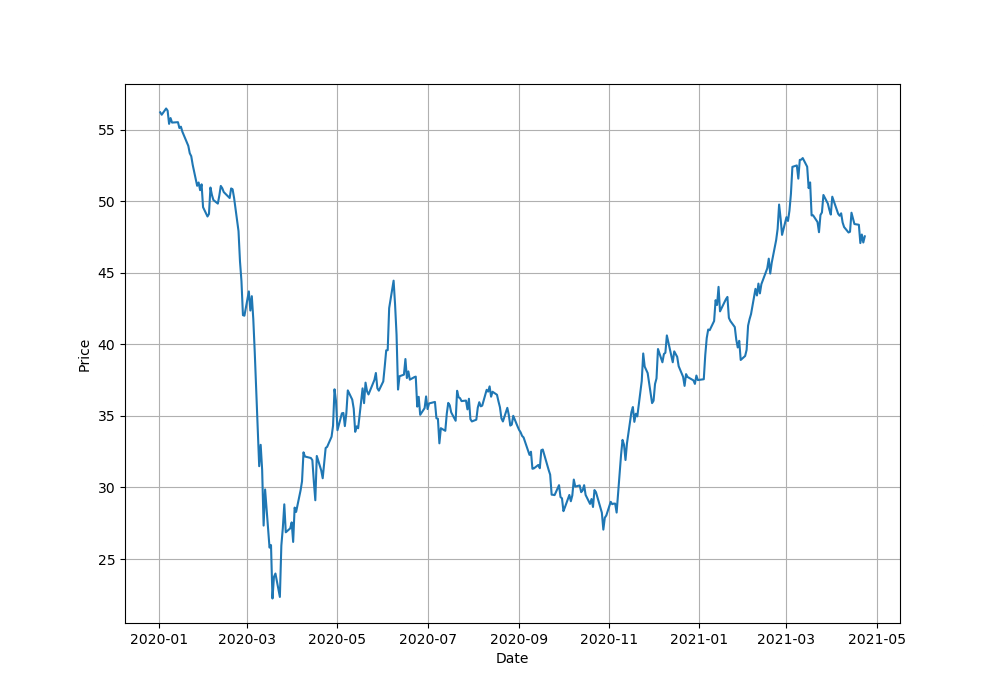

<IPython.core.display.Javascript object>


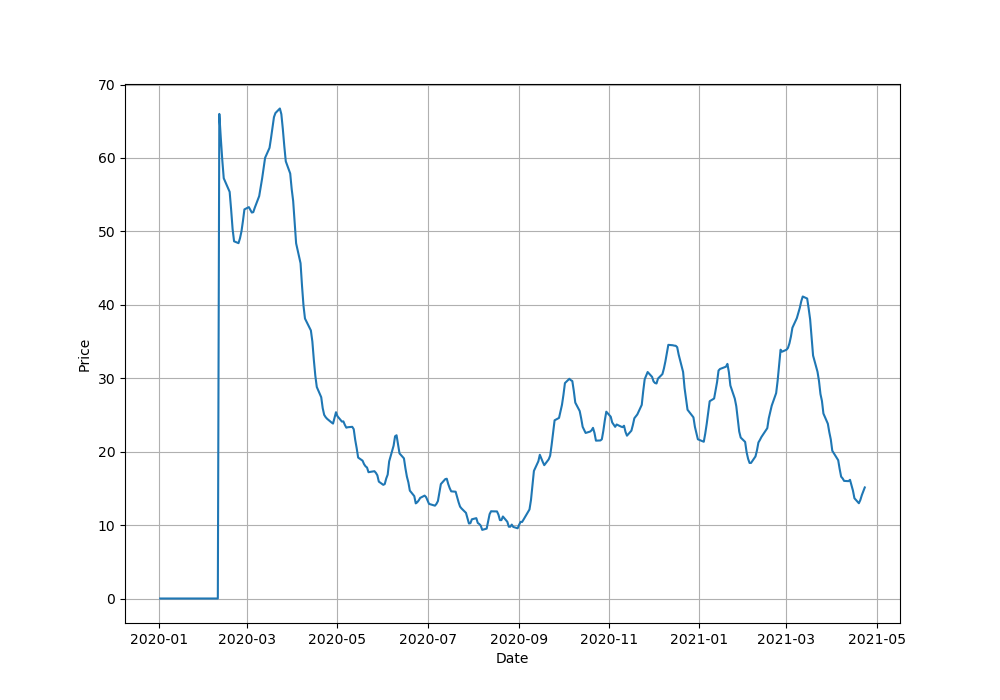

In [45]:
xle['di_pos']>xle['di_neg']

Date
2020-01-02    False
2020-01-03    False
2020-01-06    False
2020-01-07    False
2020-01-08    False
              ...  
2021-04-19    False
2021-04-20    False
2021-04-21    False
2021-04-22    False
2021-04-23    False
Length: 330, dtype: bool

<IPython.core.display.Javascript object>


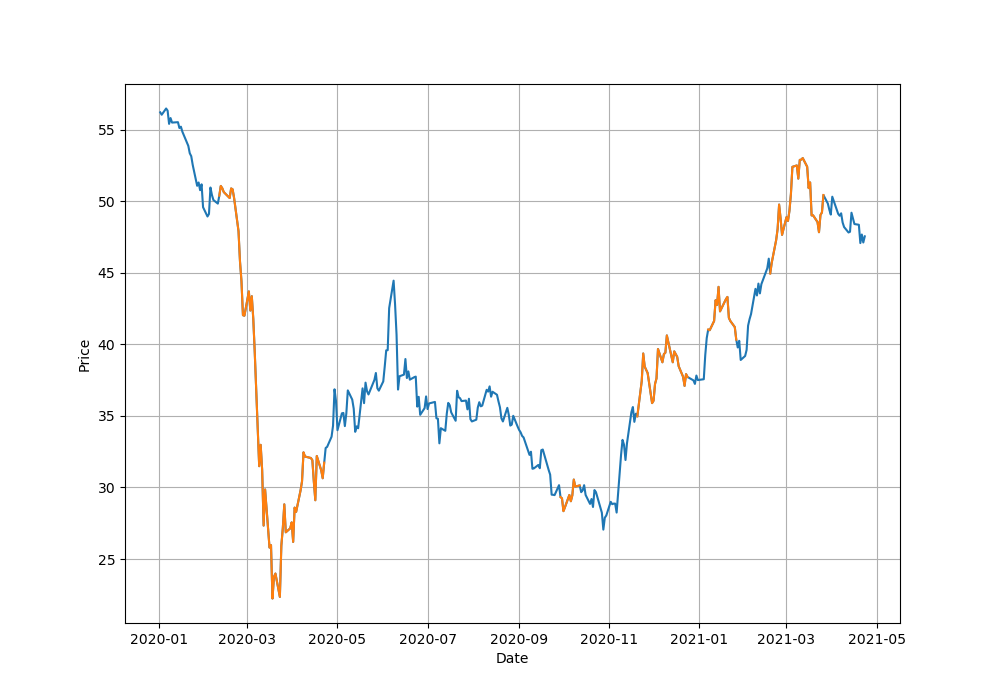

Text(0.5, 0, 'Date')

In [43]:
plt.close()
xle['trend'] = np.where(xle.adx>25,xle['Adj Close'],np.nan)

xle['trend_signal'] = np.where(xle['adx']>25,1,0)
plt.figure(figsize=(10,7))
plt.grid()
plt.plot(xle['Adj Close'])
plt.plot(xle['trend'])
plt.ylabel('Price')
plt.xlabel('Date')

<IPython.core.display.Javascript object>


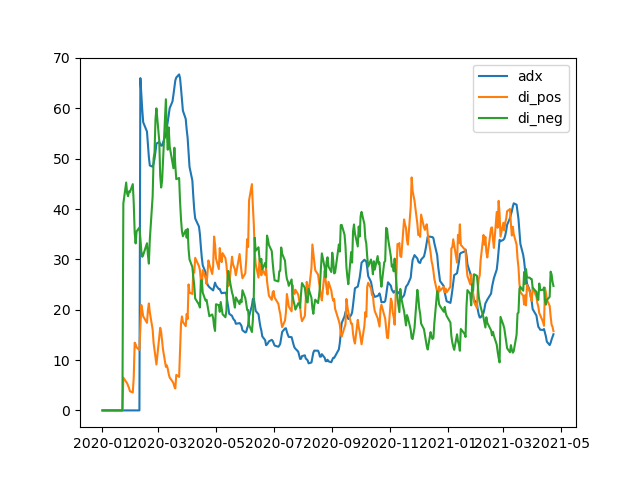

In [21]:
plt.close()
adx, = plt.plot(xle['adx'],label='adx')
di_pos, = plt.plot(xle['di_pos'],label='di_pos')
di_neg, = plt.plot(xle['di_neg'],label='di_neg')
plt.legend(handles=[adx, di_pos, di_neg])
plt.show()


# ADX INDICATOR FUNCTION

In [52]:
from ta.trend import ADXIndicator


start = '2020-1-1'

xle = yf.download('XLE', start, date.today().strftime("%Y-%m-%d"))

#take in yfinance dataframe, calculate adx, di+, di-. 
#returns inputted dataframe with column titled 'adx_indicator'
# 1 is a buy signal, 0 is a sell signal


def adx_indicator(data):
    data['Adj Open'] = data.Open * data['Adj Close']/data['Close']
    data['Adj High'] = data.High * data['Adj Close']/data['Close']
    data['Adj Low'] = data.Low * data['Adj Close']/data['Close']
    data.dropna(inplace=True)

    adxI = ADXIndicator(data['Adj High'],data['Adj Low'],data['Adj Close'],14,False)
    data['pos_directional_indicator'] = adxI.adx_pos()
    data['neg_directional_indicator'] = adxI.adx_neg()
    data['adx'] = adxI.adx()
    data['di_pos'] = adxI.adx_pos()
    data['di_neg'] = adxI.adx_neg()
    #print(data['di_neg'])
    data['trend_signal'] = np.where(data['adx']>25,1,0)
    data['adx_indicator'] = np.where((data['adx']>=25) & (data['di_pos'] >= data['di_neg']),1,0)
    return data



[*********************100%***********************]  1 of 1 completed


In [53]:
xle = adx_indicator(xle)

<IPython.core.display.Javascript object>


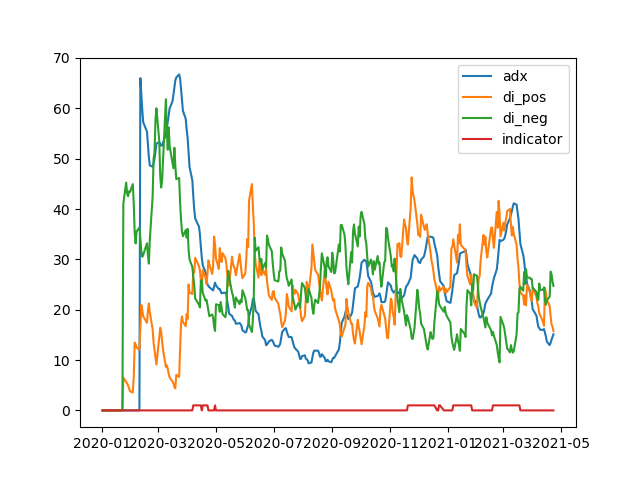

In [54]:
plt.close()
adx, = plt.plot(xle['adx'],label='adx')
di_pos, = plt.plot(xle['di_pos'],label='di_pos')
di_neg, = plt.plot(xle['di_neg'],label='di_neg')
indicator, = plt.plot(xle['adx_indicator'],label='indicator')
plt.legend(handles=[adx, di_pos, di_neg, indicator])
plt.show()